
# Introduction 
In the past few years, both the City Hotel and Resort Hotel have experienced significant increases in their cancellation rates. As a result, both hotels are currently facing a range of challenges, such as reduced revenue and underutilized hotel rooms. Therefore, the top priority for both hotels is to reduce their cancellation rates, which will enhance their efficiency in generating revenue. This report focuses on the analysis of hotel booking cancellations and other factors that do not directly impact their business and annual revenue generation


# 1. Importing libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Exploratory Data Analysis  

In [34]:
data = pd.read_csv('./hotel_bookings.csv')

df = pd.DataFrame(data)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [35]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,no,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [36]:
df.shape

(119390, 32)

In [37]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
df.info

<bound method DataFrame.info of                hotel is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel          no        342               2015   
1       Resort Hotel          no        737               2015   
2       Resort Hotel          no          7               2015   
3       Resort Hotel          no         13               2015   
4       Resort Hotel          no         14               2015   
...              ...         ...        ...                ...   
119385    City Hotel          no         23               2017   
119386    City Hotel          no        102               2017   
119387    City Hotel          no         34               2017   
119388    City Hotel          no        109               2017   
119389    City Hotel          no        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2         

In [39]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
is_canceled
['no' 'yes']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS'

# 3. Data Pre-processing

In [40]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

### 3.1 Handling Missing Values

In [41]:

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [42]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [43]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [44]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


### 3.2 Handling Duplicated Values

In [45]:
df.duplicated().any()

True

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().any()

False

In [48]:
df.shape

(86914, 30)

### 3.3 Taking The Data That The ADR(Average Daily Rate) Less Than 5000

In [49]:
df = df[df['adr'] < 5000]

In [50]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913
mean,80.203261,2016.211844,26.841853,15.818347,1.007559,2.628974,1.878603,0.139254,0.010815,0.039246,0.030237,0.176763,0.271904,0.753731,106.519911,0.083474,0.699550,2016-08-31 15:57:02.056539392
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,2016-09-08 00:00:00
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,86.103261,0.685992,13.654110,8.834535,1.028821,2.043864,0.625884,0.456850,0.113511,0.194181,0.369631,1.718149,0.728177,10.043367,51.944108,0.280441,0.831881,NaN


In [51]:
print(df['is_canceled'].unique())

['no' 'yes']


In [52]:
df['is_canceled'] = df['is_canceled'].replace({'no': 0, 'yes': 1})

In [53]:
df['is_canceled'] = df['is_canceled'].fillna(0)
print(df['is_canceled'].unique())

[0 1]


In [54]:
df['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 86913, dtype: object

# Data Analysis and Visualization

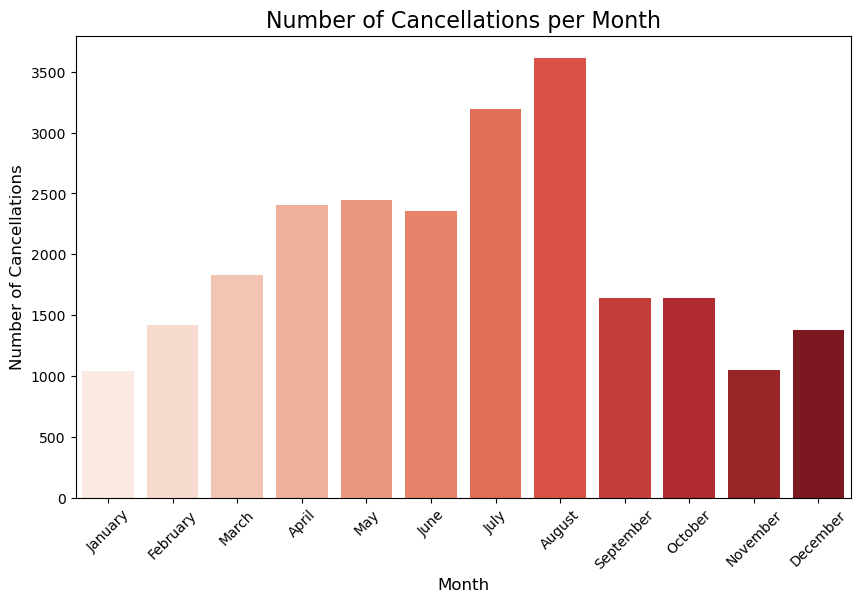

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['is_canceled'] == 1], x='arrival_date_month', order=month_order, palette='Reds')
plt.title('Number of Cancellations per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.xticks(rotation=45)
plt.show()



We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status. It's evident that the month of August stands out, having the highest numbers of  canceled reservations. In contrast, January has the fewest cancelation.



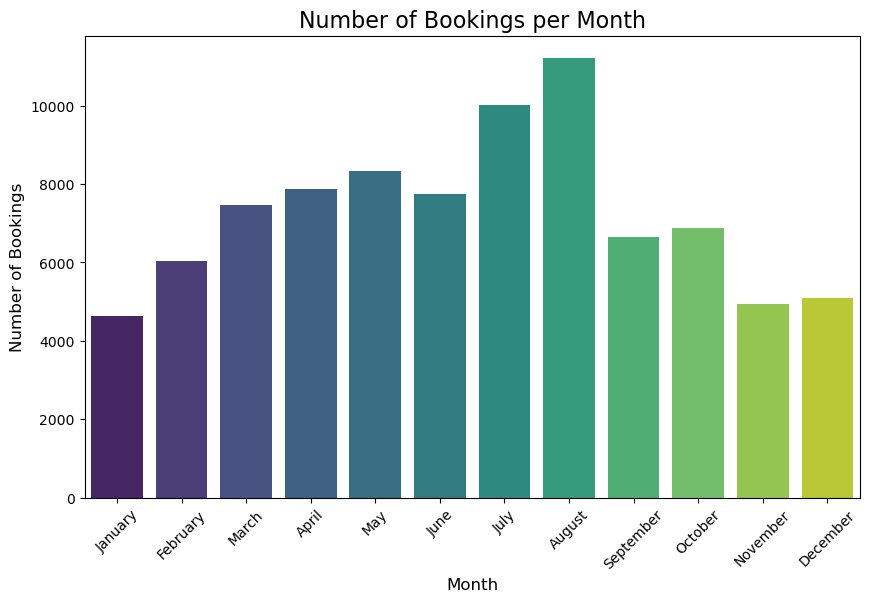

In [56]:
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='arrival_date_month', order=month_order, palette='viridis')
plt.title('Number of Bookings per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.show()

After plotting the graph, we observe a peak in bookings during August, which often coincides with the summer holiday season in many parts of the world. This period is popular for vacations among families, students, and professionals, contributing to the higher number of bookings.

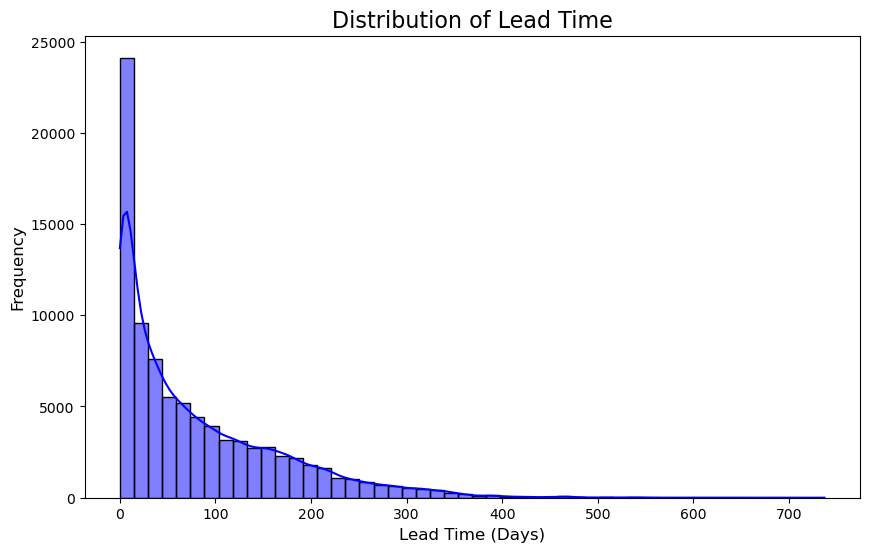

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

After plotting the graph, we observe that a lead time of around 20 days suggests most customers prefer to book their hotel accommodations approximately three weeks in advance, striking a balance between planning ahead and maintaining flexibility in their travel plans.

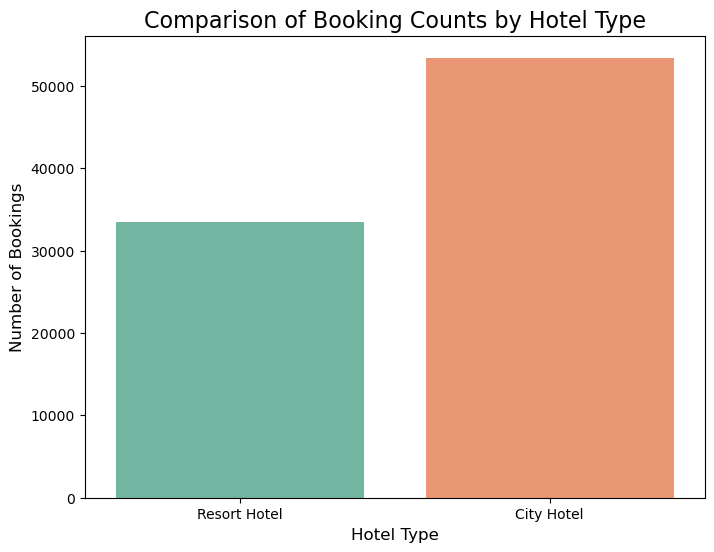

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', palette='Set2')
plt.title('Comparison of Booking Counts by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()

After plotting the graph, the higher number of bookings for city hotels suggests that customers may prioritize proximity to urban centers, business districts, or key facilities, highlighting a preference for convenience over leisure-oriented stays.

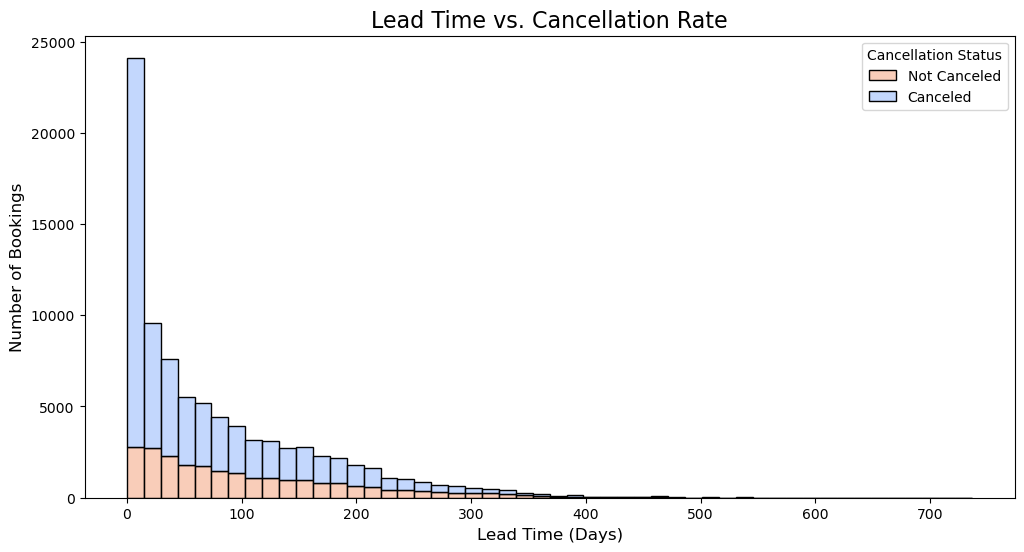

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=False, palette='coolwarm', alpha=0.7, multiple='stack')
plt.title('Lead Time vs. Cancellation Rate', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


After plotting, we can see that customers with short lead times are more likely to book impulsively and cancel as their travel plans become clearer or when they find more suitable options.

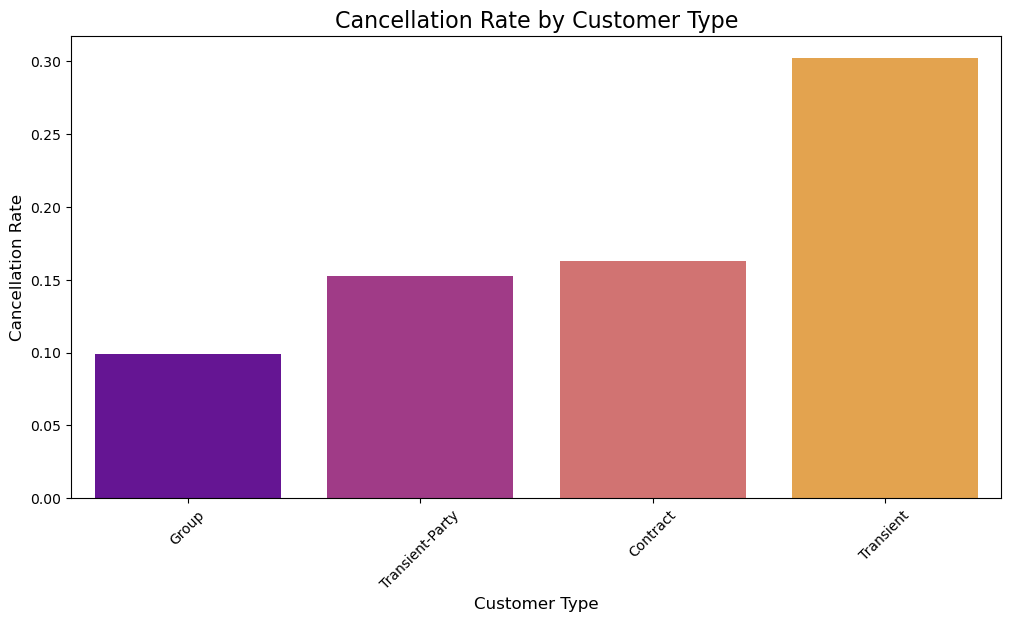

In [61]:
customer_type_cancellation = df.groupby('customer_type')['is_canceled'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_type_cancellation.index, y=customer_type_cancellation.values, palette='plasma')
plt.title('Cancellation Rate by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

After plotting, we can see that the cancellation rate is highest for Transient customers, indicating that individuals booking short-term stays are more likely to cancel last minute, possibly due to flexible schedules or unexpected changes. Contract customers have a lower cancellation rate, reflecting the commitment and stability associated with long-term or business-related bookings. Transient-Party and Group customers have slightly higher stability than transient bookings, likely due to the collective nature of their plans.

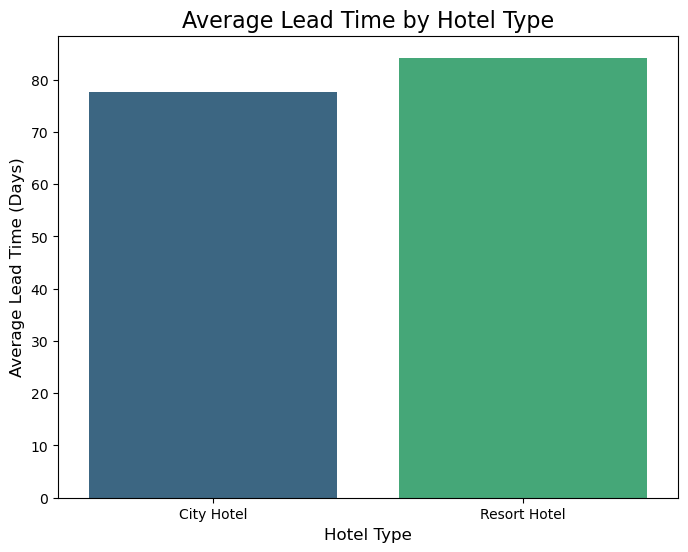

In [65]:
avg_lead_time = df.groupby('hotel')['lead_time'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_lead_time, x='hotel', y='lead_time', palette='viridis')
plt.title('Average Lead Time by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.show()


After plotting, we can see that resort hotels, which cater primarily to leisure travelers, tend to have longer lead times as people often plan their vacations well in advance, organizing trips around specific dates, holidays, or seasons. In contrast, city hotels, which primarily serve business travelers, experience shorter lead times, as business trips are often planned closer to the date of travel.

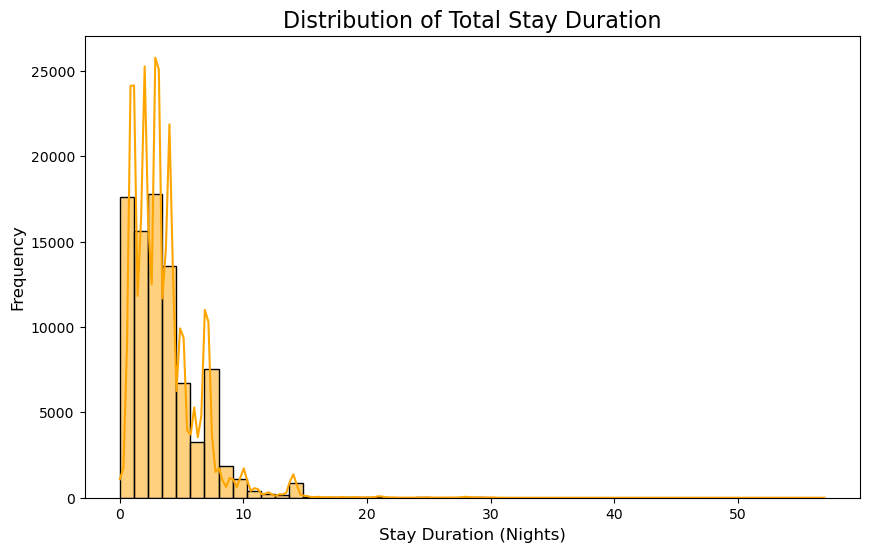

In [66]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stay_duration', bins=50, kde=True, color='orange')
plt.title('Distribution of Total Stay Duration', fontsize=16)
plt.xlabel('Stay Duration (Nights)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

After plotting, we can observe that a 6-day stay is a popular vacation length, possibly indicating that many travelers book hotel stays for a week-long holiday or business trip. This duration strikes a balance, providing enough time to relax or attend events while fitting into a typical workweek or holiday schedule.

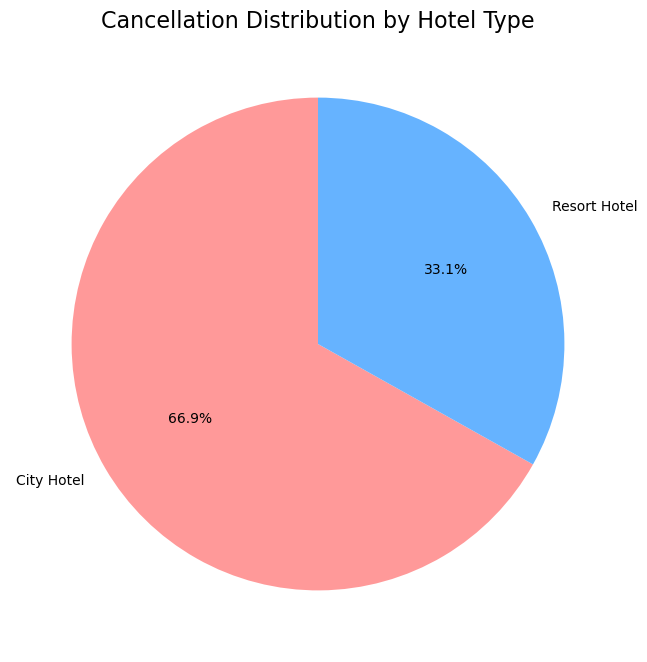

In [67]:
cancellation_by_hotel = df.groupby('hotel')['is_canceled'].sum()


plt.figure(figsize=(8, 8))
cancellation_by_hotel.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], labels=['City Hotel', 'Resort Hotel'])
plt.title('Cancellation Distribution by Hotel Type', fontsize=16)
plt.ylabel('')
plt.show()

After plotting, we can see that city hotels, often catering to business travelers, may experience higher cancellation rates because business plans are more likely to change at the last minute. In contrast, resort hotels primarily serve leisure travelers, who tend to book their stays with more certainty, especially when the bookings are part of vacation packages or group trips.

# Conclusion:
# Strategies to Reduce Cancellations for City and Resort Hotels

# For City Hotels:
## 1. Stricter Cancellation Policies
# Implement non-refundable rates or partial cancellation fees for last-minute bookings.
## 2. Flexible Options
# Offer changes without full cancellations to cater to business travelers' unpredictable schedules.
## 3. Incentivize Longer Stays
# Provide discounts for extended bookings to encourage commitment.
## 4. Targeted Marketing
# Market business packages with perks for non-cancelled bookings.

# For Resort Hotels:
## 1. Promote Early Bookings
# Offer discounts or incentives for advanced reservations to reduce cancellations.
## 2. Flexible Packages
# Offer a mix of refundable and non-refundable packages.
## 3. Customer Engagement
# Send reminders and exclusive offers close to the stay date.
## 4. Group Discounts
# Focus on group or family bookings to lower cancellations.

# General Strategies for Both Hotel Types:
## 1. Cancellation Fee Structure
# Increase cancellation fees closer to check-in.
## 2. Non-Refundable Options
# Offer non-refundable rates at discounted prices.
## 3. Promotions for Short and Long Stays
# Tailor promotions based on stay length preferences.

# By implementing these strategies, both city and resort hotels can reduce cancellations, 
# improve revenue, and maintain booking stability.
